In [1]:
# lib imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import boxcox
from scipy.stats import norm

%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
data = pd.read_csv('datasets/AB_NYC_2019.csv')

In [3]:
data.shape

(48895, 16)

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*name, host_name, last_review, and reviews_per_months* columns contain null values

### Visualization & Statistical Analysis

**Comparing mean price of all listings across different neighbour groups**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

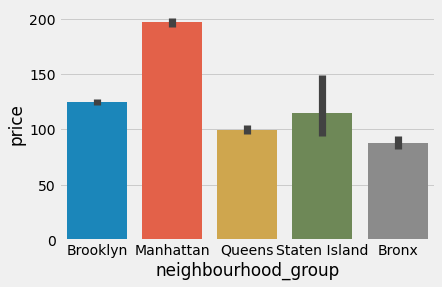

In [6]:
sns.barplot(x='neighbourhood_group', y='price', data=data, estimator=mean)

<AxesSubplot:xlabel='room_type', ylabel='price'>

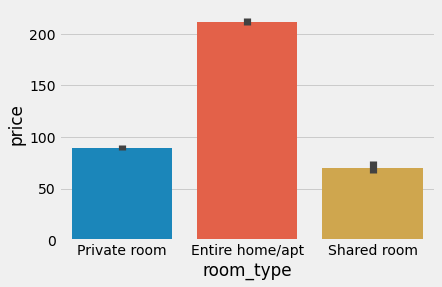

In [7]:
sns.barplot(x='room_type', y='price', data=data, estimator=mean)

For the room type, entire home/apt has the highest mean price in the New York City Airbnb listing. 7

**Comparing mean price of different room types across different neighbourhood groups**

In [8]:
pd.DataFrame(data.groupby(['room_type','neighbourhood_group']).price.mean())

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Brooklyn             178.327545
                Manhattan            249.239109
                Queens               147.050573
                Staten Island        173.846591
Private room    Bronx                 66.788344
                Brooklyn              76.500099
                Manhattan            116.776622
                Queens                71.762456
                Staten Island         62.292553
Shared room     Bronx                 59.800000
                Brooklyn              50.527845
                Manhattan             88.977083
                Queens                69.020202
                Staten Island         57.444444

<AxesSubplot:title={'center':'Shared Room'}, xlabel='neighbourhood_group', ylabel='price'>

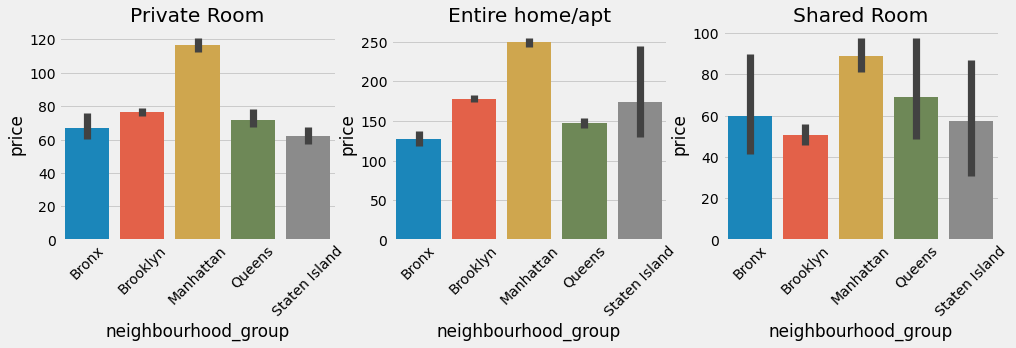

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.subplot(2,3,1)
plt.xticks(rotation=45)
plt.title('Private Room')
sns.barplot(data=data[data.room_type=='Private room'].sort_values('neighbourhood_group'), x='neighbourhood_group', y='price')

plt.subplot(2,3,2)
plt.xticks(rotation=45)
plt.title('Entire home/apt')
sns.barplot(data=data[data.room_type=='Entire home/apt'].sort_values('neighbourhood_group'), x='neighbourhood_group', y='price')

plt.subplot(2,3,3)
plt.xticks(rotation=45)
plt.title('Shared Room')
sns.barplot(data=data[data.room_type=='Shared room'].sort_values('neighbourhood_group'), x='neighbourhood_group', y='price')

This shows the average listing price across different neighbourhood groups and room types. 

* Manhattan has the highest mean price among other neighbourhood for all room types
* Brooklyn has the least mean price for the room type - 'Shared Room'
* Staten Island has the least mean price for the room type - 'Private Room'
* Bronx has the least mean price for the room type -'Entire home/apt' 

**Comparing number of listings based on neighbourhood group and room type**

Text(0.5, 1.0, 'Number of Listings In Each Neighbourhood Group')

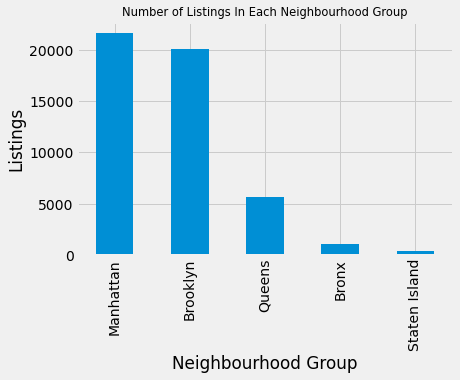

In [10]:
data.neighbourhood_group.value_counts().plot(kind='bar')

plt.rcParams.update({'font.size': 8})
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listings')
plt.title('Number of Listings In Each Neighbourhood Group')

Text(0.5, 1.0, 'Number of Listings For Each Room Type')

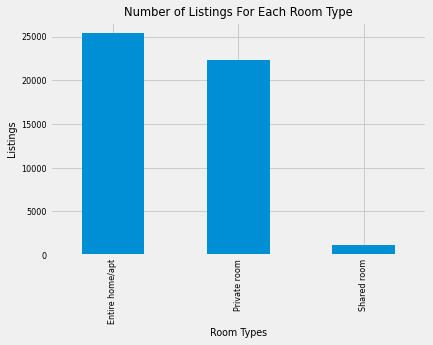

In [11]:
data.room_type.value_counts().plot(kind='bar')

plt.rcParams.update({'font.size': 8})
plt.xlabel('Room Types')
plt.ylabel('Listings')
plt.title('Number of Listings For Each Room Type')

**Comparing number of listings of different room types listed across different neighbour groups**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

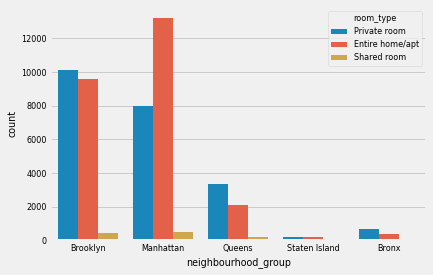

In [12]:
sns.countplot(data=data, x='neighbourhood_group', hue='room_type')

Most of Manhattan listings constitute mostly of the room type - 'Entire home/apt'. Other neighbourhoods have a relatively equal listings between 'Private room' and 'Entire home/apt'. 

### Handle missing data

In [13]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Replace NaN with value 0
data.reviews_per_month.fillna(value=0, inplace=True)

In [15]:
data.reviews_per_month.isnull().sum()

0

**Remove listings with price equals $0**

In [16]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
# Get row index to be removed
rows_index = data.loc[data.price == 0].index

# Remove rows from dataframe
data.drop(rows_index, inplace=True)

The objective is to suggest a suitable pricing according to the neighbourhood which the property is located at and the room type. The correlation between the price and columns containing the missing value will be calculated and analyzed. 

**Remove columns**

In [18]:
data.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'], inplace=True)

In [19]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Correlation

In [20]:
corr = data.corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.018719,0.019518,-0.010942
longitude,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.138435,-0.114715,0.082669
price,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.050531,0.057462,0.081847
minimum_nights,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.124870,0.127962,0.144275
number_of_reviews,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.589311,-0.072385,0.171975
reviews_per_month,-0.018719,0.138435,-0.050531,-0.124870,0.589311,1.000000,-0.047322,0.163664
calculated_host_listings_count,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.047322,1.000000,0.225712
availability_365,-0.010942,0.082669,0.081847,0.144275,0.171975,0.163664,0.225712,1.000000


<AxesSubplot:>

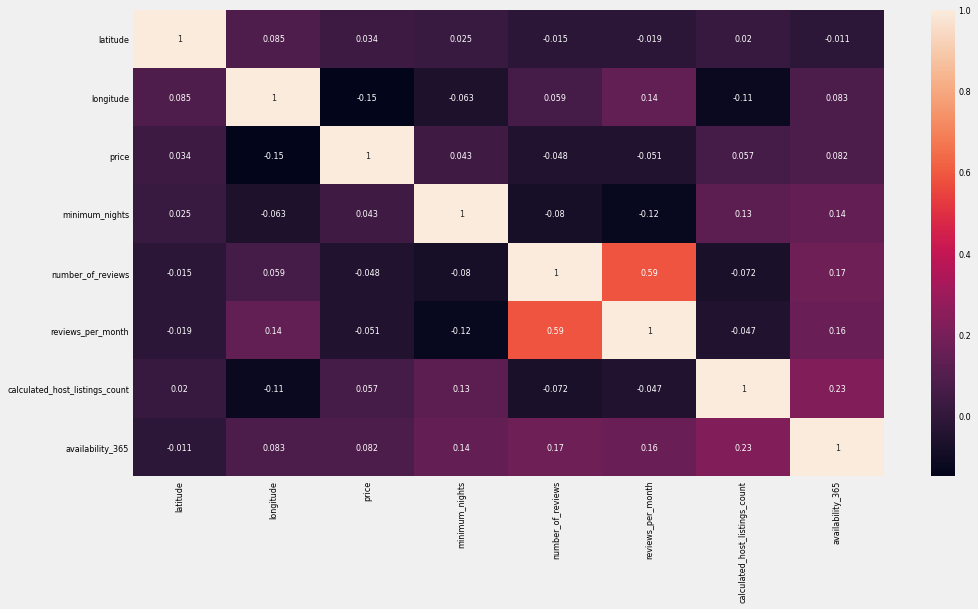

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

#### Log transform data to normal distribution
Log function does not accept negative/zero values. *0.000000001* is added to avoid division error.  

In [22]:
data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])

**Encode neighbourhood_group, neighbourhood and room_type**

In [23]:
prep_data = pd.get_dummies(data, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], prefix = ['ng', 'nh', 'rt'])
prep_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,...,nh_Williamsburg,nh_Willowbrook,nh_Windsor Terrace,nh_Woodhaven,nh_Woodlawn,nh_Woodrow,nh_Woodside,rt_Entire home/apt,rt_Private room,rt_Shared room
0,40.64749,-73.97237,149,4.342945e-10,0.954243,-0.677781,7.781513e-01,2.562293,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,4.342945e-10,1.653213,-0.420216,3.010300e-01,2.550228,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,4.771213e-01,-9.000000,-9.000000,4.342945e-10,2.562293,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,4.342945e-10,2.431364,0.666518,4.342945e-10,2.287802,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,1.000000e+00,0.954243,-1.000000,4.342945e-10,-9.000000,0,0,...,0,0,0,0,0,0,0,1,0,0


### ML Models (All)
The training models take in all values, including the outliers

In [24]:
# Create X and y
X = prep_data.drop(columns=['price'], axis=1)
y = prep_data.price
y = np.log10(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Linear Regression

In [25]:
# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [26]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: -507890049008.6311
MSE: 46621337668.32796
RMSE: 215919.7482129135


#### Decision Tree

In [27]:
clf = DecisionTreeRegressor(random_state=1) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: 0.239103534382605
MSE: 0.06984584778410016
RMSE: 0.2642836502398515


#### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_test)

In [30]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: 0.5882960192213689
MSE: 0.03779201885270918
RMSE: 0.19440169457262757


### Find the maximum

<AxesSubplot:>

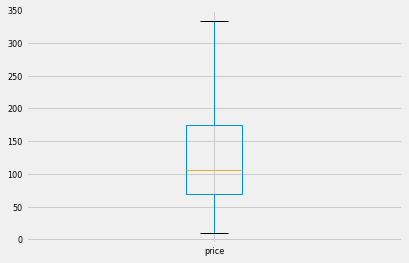

In [31]:
prep_data.boxplot(column=['price'], showfliers=False)

In [32]:
Q1 = prep_data['price'].quantile(0.25)
Q3 = prep_data['price'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + (1.5 * IQR)
upper_fence

334.0

### ML Models (Price < upper_fence)
The training models take in all values that are below the maximum

In [33]:
data_filtered_low = prep_data.loc[(data['price'] < upper_fence)]
                                  
# Create X and y
X = data_filtered_low.drop(columns=['price'], axis=1)
y = data_filtered_low.price
y = np.log10(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Linear Regression

In [34]:
# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [35]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: -5771191538786168.0
MSE: 361185248951505.2
RMSE: 19004874.34716434


#### Decision Tree

In [36]:
clf = DecisionTreeRegressor(random_state=1) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [37]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: 0.29498422304776517
MSE: 0.04412282926357171
RMSE: 0.21005434835673292


#### Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_test)

In [39]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: 0.6329480715056187
MSE: 0.0229716413465731
RMSE: 0.1515639843319418


### ML Models (Price > upper_fence)
The training models take in all values that are above the maximum

In [40]:
data_filtered_high = prep_data.loc[(data['price'] > upper_fence)]
                                  
# Create X and y
X = data_filtered_high.drop(columns=['price'], axis=1)
y = data_filtered_high.price
y = np.log10(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Linear Regression

In [41]:
# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [42]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: -5.435843535585452e+18
MSE: 2.6780628577030794e+17
RMSE: 517500034.56068283


#### Decision Tree

In [43]:
clf = DecisionTreeRegressor(random_state=1) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [44]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: -1.1041461274185504
MSE: 0.10366441848684459
RMSE: 0.3219695924879314


#### Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)

In [46]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2 Score: {}'.format(score))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

r2 Score: 0.11285311612749127
MSE: 0.04370683415504362
RMSE: 0.20906179506319086


### Conclusion

The models are trained using different sets of data:
* data with outliers
* data below maximum (< \$334)
* data above maximum (> \$334)


From all the models that we used, Random Forest Regression Model provides the highest accuracy score. Among the 3 datasets, the datasets below maximum produces the higest accuracy score *(r2 score = 0.63259)*. However, the observations are insufficient to accurately suggest the best suitable price. 